# BoomBikes Case Study
- This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes. You will need to submit a Jupyter notebook for the same. 

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


#### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## 1. Data Importing and Understanding
###   1.1. Data Laod

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [49]:
# Importing necessary libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mlt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [3]:
# Importing Data from day.csv
boombikes = pd.read_csv("day.csv")

In [50]:
print(mlt.__version__)

3.4.3


###   1.2. Data Understanding

In [4]:
# Checking first five rows
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# checking data Shape
boombikes.shape

(730, 16)

In [6]:
# Checking columns and types
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
boombikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Observation: -----------------------------------------
- All fields having values, no nulls So skipping the steps `Handling nulls`.
- `dtedate` is the only column having Object type values, having dates.
- `cnt` is having the sum of `casual` and `registered` count of users columns. So not required to have duplicated filed, so dropping `casual` and `registered`.
- `temp` and `atemp` having similar values, so keeping only one `temp` and  dropping `atemp`
- `instant` is having the row number, so dropping `instant`

## 2.  Data Cleaning 
### 2.1. Remove columns with all nulls and non-unique value in all rows
- Skipping as all columns having values. no nulls.

### 2.2.  Extracting `Day` from `dteday`

In [8]:
boombikes["day"]=pd.DatetimeIndex(boombikes.dteday).day

### 2.2.  No use of the following columns, these should be removed.
- `casual`        : already included in cnt
- `registered`    : already included in cnt
- `atemp`         : temp is used 
- `instant`       : Primery key 
- `dteday`        : Extracted day from date
- `weekday`       : `weekday` is a cyclic value variable, so no use.


In [9]:
# Dropping other non-required columns
boombikes = boombikes.drop(columns=["casual","registered","atemp","instant","dteday","weekday"], axis=1)

### 2.3.  Renaming (for better clarity of column names)
*    `yr` - > `year19`
*    `cnt` - > `users`
*    `hum` - > `humidity`

In [10]:
# Renaming
boombikes.rename(columns={"yr":"year19","cnt":"users","hum":"humidity"}, inplace=True)

### 2.4. Splitting the categorical variable to dummy Variables

- Mapping the variables to catetgory `season` and `weathersit`
- Making dummy variables form categorical variables

In [11]:
boombikes["season"] = boombikes["season"].map({1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"})
boombikes["weathersit"] = boombikes["weathersit"].map({1:"Clear", 2:"Cloudy", 3:"LightRain", 4:"HeavyRain"})
boombikes.head()

,season,year19,mnth,holiday,workingday,weathersit,temp,humidity,windspeed,users,day
0,Spring,0,1,0,0,Cloudy,14.110847,80.5833,10.749882,985,1
1,Spring,0,1,0,0,Cloudy,14.902598,69.6087,16.652113,801,1
2,Spring,0,1,0,1,Clear,8.050924,43.7273,16.636703,1349,1
3,Spring,0,1,0,1,Clear,8.200000,59.0435,10.739832,1562,1
4,Spring,0,1,0,1,Clear,9.305237,43.6957,12.522300,1600,1


In [12]:
season = pd.get_dummies(boombikes[['season','weathersit']], drop_first = True)
print(season.head())


   season_Spring  season_Summer  season_Winter  weathersit_Cloudy  \
0              1              0              0                  1   
1              1              0              0                  1   
2              1              0              0                  0   
3              1              0              0                  0   
4              1              0              0                  0   

   weathersit_LightRain  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  


### Observation: -----------------------------------------
- Dropping first column from Category as we can derive first category from rest of caegorical dummy variables.
- `weathersit` is not having `HeavyRain` data. so not removing first column from `weathersit`


Now, `season` column is identified with 3 columns where — 
- `100` will correspond to `season_Spring`
- `010` will correspond to `season_Summer`
- `001` will correspond to `season_Winter`
- `000` will correspond to `season_Fall`

Now, `weathersit` column is identified with 3 columns,  where — 
- `00` will correspond to `weathersit_Clear`
- `10` will correspond to `weathersit_Cloudy`
- `01` will correspond to `weathersit_LightRain`

### 2.5. Merging the datasets with dummy variables and removing the categorical variable from the main dataset.

In [13]:
boombikes = pd.concat([boombikes, season], axis = 1)
boombikes.head()

,season,year19,mnth,holiday,workingday,weathersit,temp,humidity,windspeed,users,day,season_Spring,season_Summer,season_Winter,weathersit_Cloudy,weathersit_LightRain
0,Spring,0,1,0,0,Cloudy,14.110847,80.5833,10.749882,985,1,1,0,0,1,0
1,Spring,0,1,0,0,Cloudy,14.902598,69.6087,16.652113,801,1,1,0,0,1,0
2,Spring,0,1,0,1,Clear,8.050924,43.7273,16.636703,1349,1,1,0,0,0,0
3,Spring,0,1,0,1,Clear,8.200000,59.0435,10.739832,1562,1,1,0,0,0,0
4,Spring,0,1,0,1,Clear,9.305237,43.6957,12.522300,1600,1,1,0,0,0,0


## 3: Visualising the Data for better understanding
### 3.1.  Visualising Categorical Variables

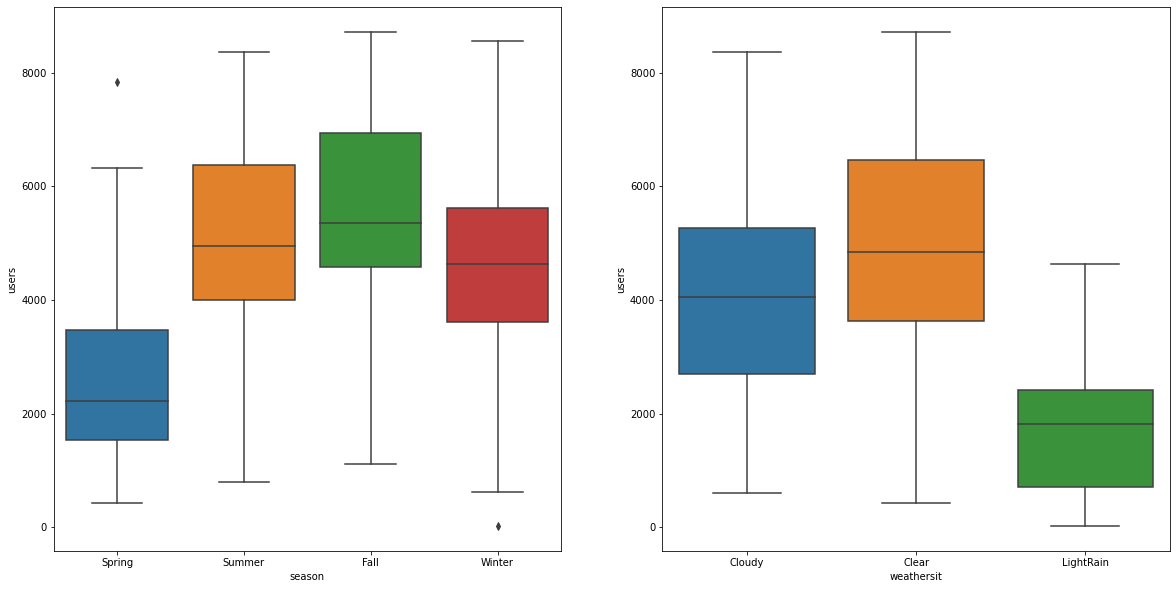

In [14]:
plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
sns.boxplot(x = 'season', y = 'users', data = boombikes)
plt.subplot(1,2,2)
sns.boxplot(x = 'weathersit', y = 'users', data = boombikes)
plt.show()

### Observation: -----------------------------------------
- Most bookings during `Fall` season and second most in `Summer` season
- Most bookings when `weathersit` is `clear` and second most when `Cloudy`
- There are no booking on a `HeavyRain`


### 3.2.  Visualising Other Variables

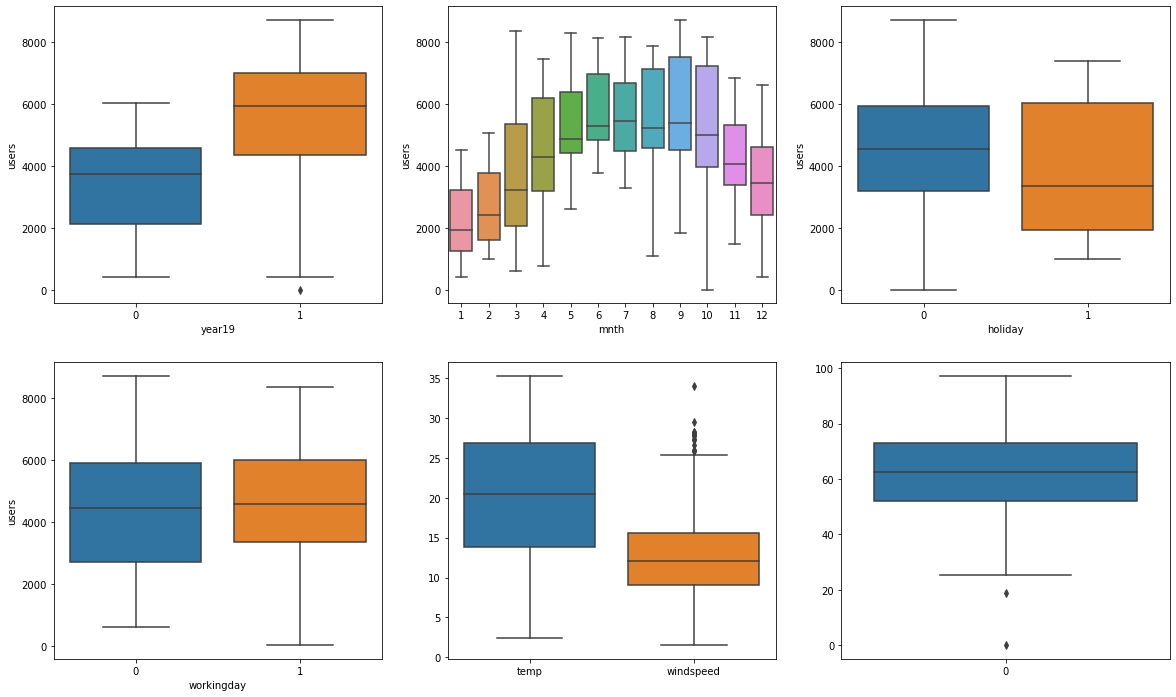

In [15]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'year19', y = 'users', data = boombikes)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'users', data = boombikes)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'users', data = boombikes)
plt.subplot(2,3,4)
sns.boxplot(x = 'workingday', y = 'users', data = boombikes)
plt.subplot(2,3,5)
sns.boxplot(data = boombikes[['temp','windspeed']])
# plt.scatter(boombikes.users, boombikes.temp)
# plt.xlabel('users', fontsize = 10)
# plt.ylabel('temp', fontsize = 10)
plt.subplot(2,3,6)
sns.boxplot(data = boombikes.humidity)
# plt.scatter(boombikes.users, boombikes.humidity)
# plt.xlabel('users', fontsize = 10)
# plt.ylabel('Humidity', fontsize = 10)
plt.show()

### Observation: -----------------------------------------
- Most bookings during `Fall` season and second most in `Summer` season
- Most bookings when `weathersit` is `clear` and second most when `Cloudy`


### 3.2.  Visualising all variables ugin heatmap to check correlations

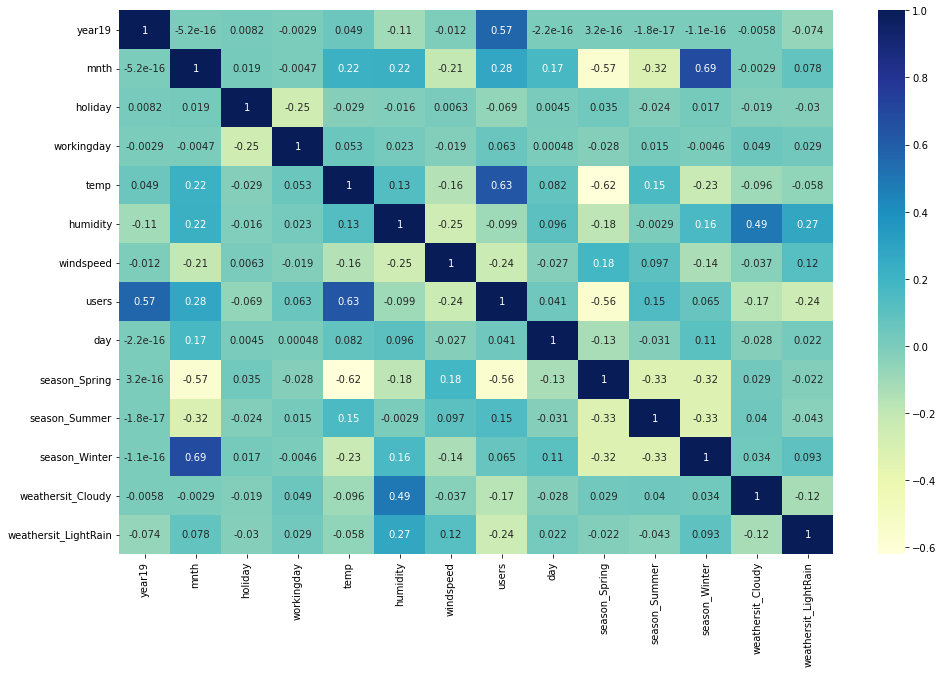

In [16]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(boombikes.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Observation: -----------------------------------------
- As you might have noticed, `temp` seems to the correlated to `users` the most. Let's see a pairplot for `temp` vs `users`
- `year19` is second most correlated followed by `mnth` to users but considering Boom bikes performed bettwer in 2019 compared to 2018.
- so, `Summer` and `Clear` are the second most high correlated to `users`.
- Rest another variables are very leass correlated, so we can ignore for now.

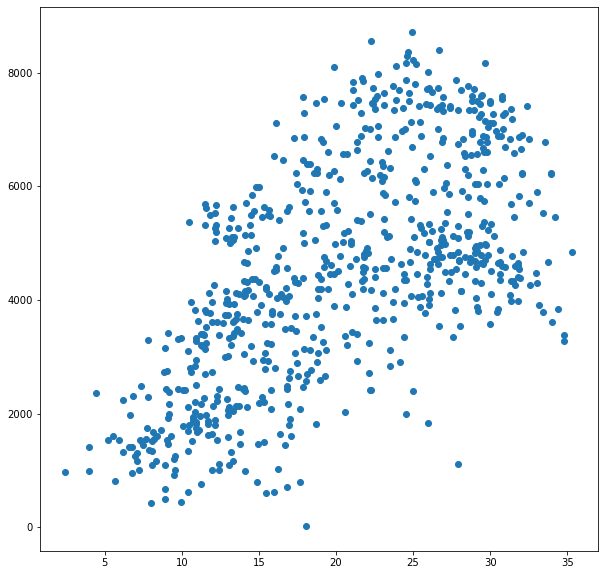

In [17]:
plt.figure(figsize=[10,10])
plt.scatter(boombikes.temp, boombikes.users)
plt.show()

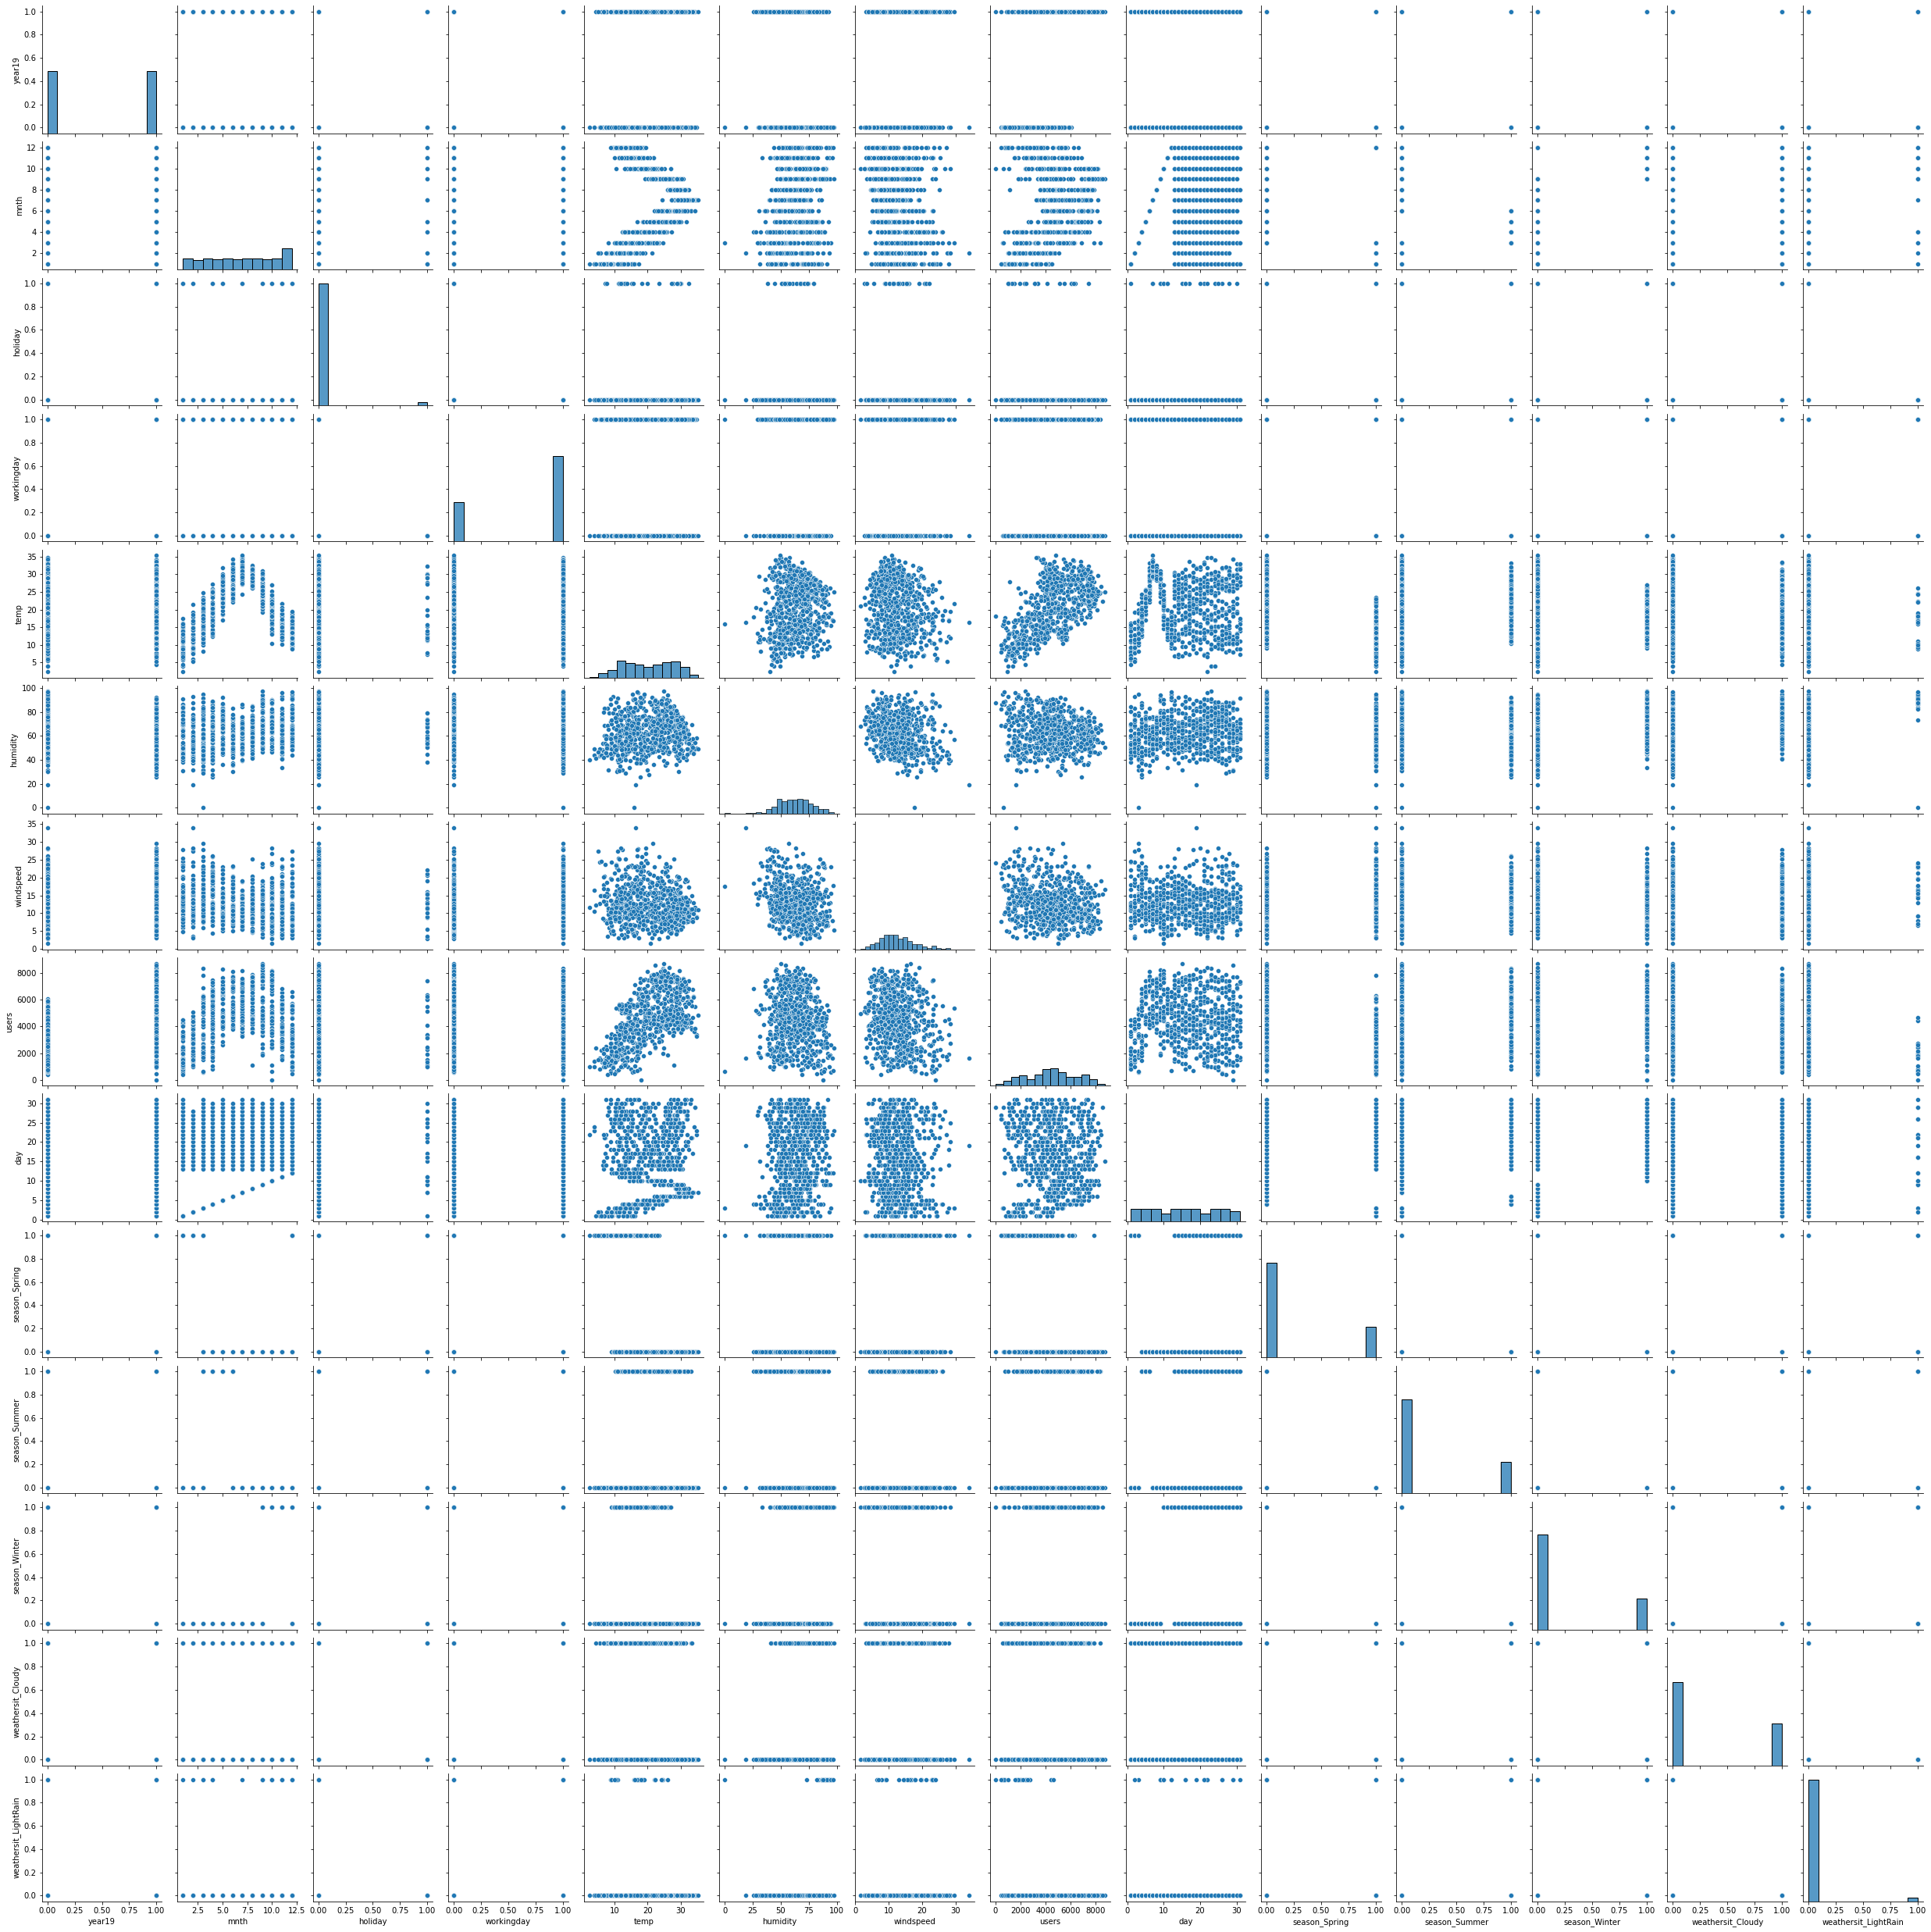

In [18]:
# ploting a pair plot for with all variables
sns.pairplot(boombikes)
plt.show()

## 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [19]:
# Dropping `season`,`weathersit` from datset
boombikes.drop(['season','weathersit'], axis = 1, inplace = True)

In [20]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bb_train, bb_test = train_test_split(boombikes, train_size = 0.7, test_size = 0.3, random_state = 100)

## 5: Data Preparation
### 5.1. Rescaling the Features 

- Min-Max scaling 

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [22]:
bb_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year19                510 non-null    int64  
 1   mnth                  510 non-null    int64  
 2   holiday               510 non-null    int64  
 3   workingday            510 non-null    int64  
 4   temp                  510 non-null    float64
 5   humidity              510 non-null    float64
 6   windspeed             510 non-null    float64
 7   users                 510 non-null    int64  
 8   day                   510 non-null    int64  
 9   season_Spring         510 non-null    uint8  
 10  season_Summer         510 non-null    uint8  
 11  season_Winter         510 non-null    uint8  
 12  weathersit_Cloudy     510 non-null    uint8  
 13  weathersit_LightRain  510 non-null    uint8  
dtypes: float64(3), int64(6), uint8(5)
memory usage: 42.3 KB


In [23]:
bb_train.describe()

,year19,mnth,holiday,workingday,temp,humidity,windspeed,users,day,season_Spring,season_Summer,season_Winter,weathersit_Cloudy,weathersit_LightRain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.507843,6.549020,0.025490,0.676471,20.102429,63.112926,12.831318,4486.382353,15.650980,0.243137,0.245098,0.24902,0.343137,0.029412
std,0.500429,3.468714,0.157763,0.468282,7.431169,14.156632,5.291832,1952.158739,8.842418,0.429398,0.430568,0.43287,0.475223,0.169124
min,0.000000,1.000000,0.000000,0.000000,2.424346,0.000000,2.834381,22.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,3.000000,0.000000,0.000000,13.606865,52.270825,9.041918,3120.000000,8.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,7.000000,0.000000,1.000000,20.209597,63.437500,12.083182,4530.000000,16.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,10.000000,0.000000,1.000000,26.615847,73.250025,15.750879,5973.500000,23.000000,0.000000,0.000000,0.00000,1.000000,0.000000
max,1.000000,12.000000,1.000000,1.000000,35.328347,97.041700,34.000021,8714.000000,31.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [24]:
# Apply scaler() to all the columns except the 'dteday', 'year19','holiday','workingday','Spring',
# 'Summer','Winter','Clear','Cloudy','LightRain' variables
num_vars = ['mnth','temp','humidity','windspeed','users','day']
bb_train[num_vars] = scaler.fit_transform(bb_train[num_vars])
# 'Spring','Summer','Winter',
# 'Clear', 'Cloudy', 'LightRain'

In [25]:
bb_train.describe()

,year19,mnth,holiday,workingday,temp,humidity,windspeed,users,day,season_Spring,season_Summer,season_Winter,weathersit_Cloudy,weathersit_LightRain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.507843,0.504456,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.488366,0.243137,0.245098,0.24902,0.343137,0.029412
std,0.500429,0.315338,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.294747,0.429398,0.430568,0.43287,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.181818,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.233333,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,0.545455,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.500000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,0.818182,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.733333,0.000000,0.000000,0.00000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## 6: Building model

### 6.1 Dividing into X and Y sets for the model building

In [26]:
y_train = bb_train.pop('users')
X_train = bb_train

In [27]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: users, dtype: float64

In [28]:
X_train.head()

,year19,mnth,holiday,workingday,temp,humidity,windspeed,day,season_Spring,season_Summer,season_Winter,weathersit_Cloudy,weathersit_LightRain
653,1,0.818182,0,1,0.509887,0.575354,0.300794,0.500000,0,0,1,0,0
576,1,0.545455,0,1,0.815169,0.725633,0.264686,1.000000,0,0,0,0,0
426,1,0.181818,0,0,0.442393,0.640189,0.255342,0.066667,1,0,0,1,0
728,1,1.000000,0,0,0.245101,0.498067,0.663106,0.966667,1,0,0,0,0
482,1,0.272727,0,0,0.395666,0.504508,0.188475,0.900000,0,1,0,1,0


### 6.2. Adding All feature variables to the Model and remove the least dependent

In [29]:
#Building a linear model with all variables
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_lm = sm.add_constant(X_train)
lr_all = sm.OLS(y_train, X_train_lm).fit()

# print(lr_all.params)
print(lr_all.summary())
print('|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|')
print('|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|')

# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  users   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.74e-180
Time:                        18:36:19   Log-Likelihood:                 488.48
No. Observations:                 510   AIC:                            -949.0
Df Residuals:                     496   BIC:                            -889.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2750 

### Observation: -----------------------------------------
- Dropping `day`, since they have highest p-value `0.516`

In [30]:
# Dropping `day` from X_train
X_train = X_train.drop(['day'], 1)
X_train.head()

,year19,mnth,holiday,workingday,temp,humidity,windspeed,season_Spring,season_Summer,season_Winter,weathersit_Cloudy,weathersit_LightRain
653,1,0.818182,0,1,0.509887,0.575354,0.300794,0,0,1,0,0
576,1,0.545455,0,1,0.815169,0.725633,0.264686,0,0,0,0,0
426,1,0.181818,0,0,0.442393,0.640189,0.255342,1,0,0,1,0
728,1,1.000000,0,0,0.245101,0.498067,0.663106,1,0,0,0,0
482,1,0.272727,0,0,0.395666,0.504508,0.188475,0,1,0,1,0


In [31]:
X_train_lm = sm.add_constant(X_train)
lr_all_2 = sm.OLS(y_train, X_train_lm).fit()

# print(lr_all.params)
print(lr_all_2.summary())
print('|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|')
print('|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|')

# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  users   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     200.2
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.49e-181
Time:                        18:36:19   Log-Likelihood:                 488.26
No. Observations:                 510   AIC:                            -950.5
Df Residuals:                     497   BIC:                            -895.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2710 

### Observation: -----------------------------------------
Dropping `mnth` , since they have highest p-value `0.480`

In [32]:
# Dropping `mnth` from X_train
X_train = X_train.drop(['mnth'], 1)
X_train.head()

,year19,holiday,workingday,temp,humidity,windspeed,season_Spring,season_Summer,season_Winter,weathersit_Cloudy,weathersit_LightRain
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,1,0


In [33]:
X_train_lm = sm.add_constant(X_train)
lr_all_3 = sm.OLS(y_train, X_train_lm).fit()

# print(lr_all.params)
print(lr_all_3.summary())
print('|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|')
print('|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|')

# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  users   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     218.6
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.26e-182
Time:                        18:36:19   Log-Likelihood:                 488.00
No. Observations:                 510   AIC:                            -952.0
Df Residuals:                     498   BIC:                            -901.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2801 

### Observation: -----------------------------------------
Dropping `humidity` , since they have highest VIF `27.33`

In [34]:
# Dropping `mnth` from X_train
X_train = X_train.drop(['humidity'], 1)
X_train.head()

,year19,holiday,workingday,temp,windspeed,season_Spring,season_Summer,season_Winter,weathersit_Cloudy,weathersit_LightRain
653,1,0,1,0.509887,0.300794,0,0,1,0,0
576,1,0,1,0.815169,0.264686,0,0,0,0,0
426,1,0,0,0.442393,0.255342,1,0,0,1,0
728,1,0,0,0.245101,0.663106,1,0,0,0,0
482,1,0,0,0.395666,0.188475,0,1,0,1,0


In [35]:
X_train_lm = sm.add_constant(X_train)
lr_all_4 = sm.OLS(y_train, X_train_lm).fit()

# print(lr_all.params)
print(lr_all_4.summary())
print('|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|')
print('|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|/|\|')

# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  users   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     233.8
Date:                Wed, 11 May 2022   Prob (F-statistic):          3.79e-181
Time:                        18:36:20   Log-Likelihood:                 481.67
No. Observations:                 510   AIC:                            -941.3
Df Residuals:                     499   BIC:                            -894.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2101 

### Observation: -----------------------------------------
- the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model.

## 7. Relationship check and residual Analysis of the train data

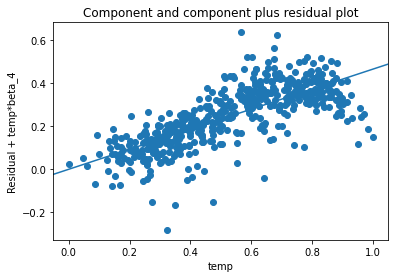

In [36]:
# Checking the Linearity assumption is preserved between Users and temp.
sm.graphics.plot_ccpr(lr_all_4, 'temp')
plt.show()

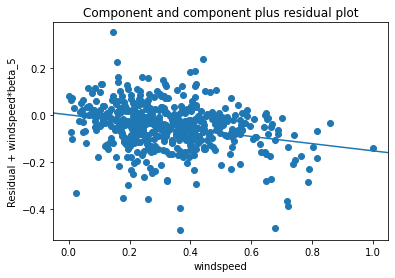

In [37]:
# Checking the Linearity assumption is preserved between Users and windspeed.
sm.graphics.plot_ccpr(lr_all_4, 'windspeed')
plt.show()

### Observation: -----------------------------------------
- Linearity is well-preserved for both temp and windspeed features.

In [38]:
# Residual Analysis of the train data
y_train_users = lr_all_4.predict(X_train_lm)

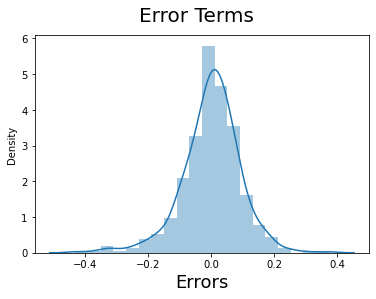

In [39]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_users), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

### Observation: -----------------------------------------
- Normal distribution of error terms, around mean 0 

## 8. Making Predictions Using the Final Model


In [40]:
# num_vars = X_train.columns
num_vars = ['mnth', 'temp', 'humidity', 'windspeed', 'users', 'day']
bb_test[num_vars] = scaler.transform(bb_test[num_vars])
num_vars

['mnth', 'temp', 'humidity', 'windspeed', 'users', 'day']

In [41]:
bb_test.describe()

,year19,mnth,holiday,workingday,temp,humidity,windspeed,users,day,season_Spring,season_Summer,season_Winter,weathersit_Cloudy,weathersit_LightRain
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.497717,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.497565,0.255708,0.264840,0.232877,0.319635,0.027397
std,0.500722,0.311080,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.290688,0.437258,0.442259,0.423633,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.272727,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.266667,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.454545,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.466667,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.727273,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,0.766667,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [42]:
y_test = bb_test.pop('users')
X_test = bb_test

# Adding constant variable to test dataframe
X_test_All = sm.add_constant(X_test)

# Creating X_test_m4 dataframe by dropping variables from X_test_m4
X_test_All = X_test_All.drop(['humidity', 'mnth', 'day'], axis = 1)

# Making predictions using the fourth model
y_pred_All = lr_all_4.predict(X_test_All)

## 9.  Model Evaluation


### 9.1.  Checking R-squared and Adjusted R-squared for Test dataset

In [43]:
# R-square for test
from sklearn.metrics import r2_score
rSqu = r2_score(y_test, y_pred_All)

n = X_test_All.shape[0]
p = X_test_All.shape[1]

# We find the Adjusted R-squared using the formula
AdvRSqu = round(1-(1-rSqu)*(n-1)/(n-p-1),4)

print(rSqu)
print(AdvRSqu)

0.8009169325120373
0.7903


### 9.2. Ploting the graph for actual versus predicted values.

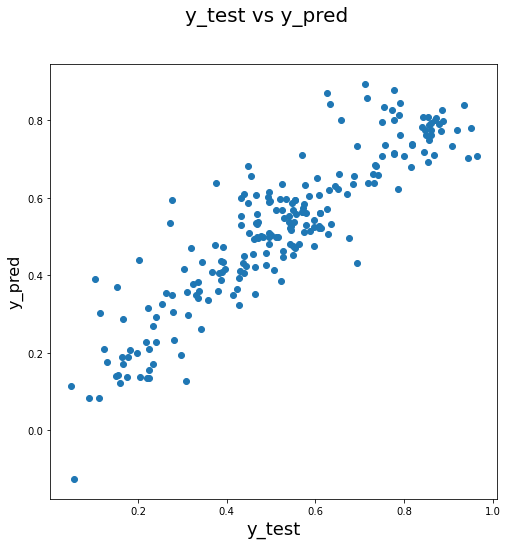

In [44]:
fig = plt.figure(figsize=[8,8])
plt.scatter(y_test, y_pred_All)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)
plt.show()

### Observation: -----------------------------------------
- y_test vs y_pred are very similar. 

### Summary:

#### Variables/features that drives the prediction:
- `temp` with the coefficient of 0.4657
- `weathersit_LightRain` with the coefficient of -0.2810
- `windspeed` with the coefficient of -0.1807
 
#### Comparison of Train vs Test (R-squared and Adj. R-squared)
- Model R-squared : 0.824
- Model Adjusted R-squared : 0.821
- Test dataset R-squared: 0.80
- Test dataset Adjusted R-squared: 0.790
- Difference in R-squared : 2.4%
- Difference in adjusted R-squared :3% (which is <5%)


#### Final equation for the best fitted line is:
$ Users = year19  \times  0.2336 - holiday  \times  0.0758 + workingday  \times  0.0178 + temp  \times  0.4657 - windspeed  \times  0.1528 - season_Spring  \times  0.0821 + season_Summer  \times  0.0370 + season_Winter  \times  0.0769 - weathersit_Cloudy  \times  0.0770 - weathersit_LightRain  \times  0.2810 $